In [1]:
#### Tutorial Overview
#1. Change Data Distribution
#2. Quantile Transform
#3. Normal Quantile Transform
#4. Uniform Quantile Transform

### Quantile Transform

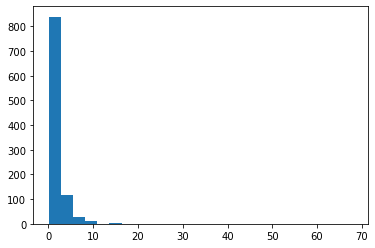

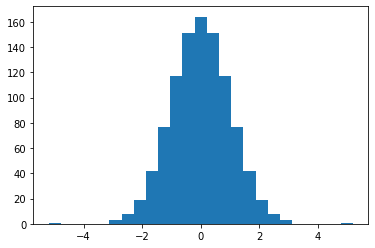

In [4]:
## demonstration of the quantile transform

import numpy as np
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt

data = np.random.randn(1000)

data = np.exp(data)

plt.hist(data,bins=25)
plt.show()

data = data.reshape((len(data),1))
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(data)

plt.hist(data_trans,bins=25)
plt.show()

D:\Anaconda_Distribution\envs\newEnv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

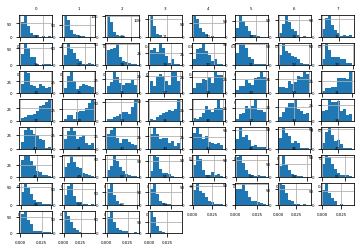

In [6]:
### load and summarize the sonar dataset
import pandas as pd
dataset = pd.read_csv('../dataset/sonar.csv',header=None)
print(dataset.shape)
print(dataset.describe())

fig = dataset.hist(xlabelsize=4,ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

plt.show()

In [7]:
### evaluating KNN on raw data

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# load dataset
dataset = pd.read_csv('../dataset/sonar.csv',header=None)

data = dataset.values

X = data[:,:-1]
y = data [:,-1]

le = LabelEncoder()
y = le.fit_transform(y.astype('str'))

model = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
scores =cross_val_score(model,X,y,cv=cv,scoring="accuracy",n_jobs=-1)

print("Accuracy is %.3f (%.3f)"%(np.mean(scores),np.std(scores)))

D:\Anaconda_Distribution\envs\newEnv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda_Distribution\envs\newEnv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda_Distribution\envs\newEnv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Accuracy is 0.797 (0.073)


#### Normal Quantile Transform

(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

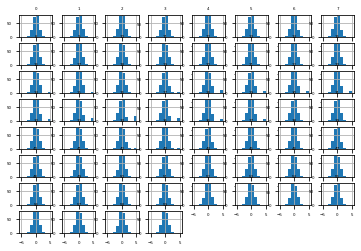

In [8]:

from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline

dataset = pd.read_csv('../dataset/sonar.csv',header=None)
print(dataset.shape)
print(dataset.describe())

data = dataset.values[:,:-1]

transform = QuantileTransformer(output_distribution="normal",n_quantiles=100)
#scaler = MinMaxScaler(feature_range=(1,2))
#pipeline = Pipeline([('scaler',scaler),('tr',transform)])

data = transform.fit_transform(data)

dataset = pd.DataFrame(data)

fig = dataset.hist(xlabelsize=4,ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

plt.show()

In [9]:
#Evaluating the dataset using KNN
# load dataset
dataset = pd.read_csv('../dataset/sonar.csv',header=None)

data = dataset.values

X = data[:,:-1]
y = data [:,-1]

le = LabelEncoder()
y = le.fit_transform(y.astype('str'))

model = KNeighborsClassifier()

transform = QuantileTransformer(output_distribution="normal",n_quantiles=100)
#scaler = MinMaxScaler(feature_range=(1,2))

pipeline = Pipeline([('tr',transform),('model',model)])

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
scores =cross_val_score(pipeline,X,y,cv=cv,scoring="accuracy",n_jobs=-1)

print("Accuracy is %.3f (%.3f)"%(np.mean(scores),np.std(scores)))

Accuracy is 0.817 (0.087)


#### Uniform Quantile transformation

(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

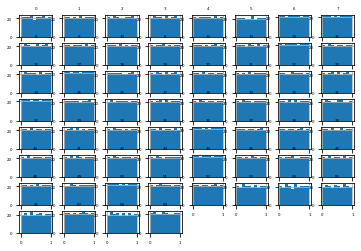

In [10]:
## Visualizing the uniform quantile transform of sonar dataset
dataset = pd.read_csv('../dataset/sonar.csv',header=None)
print(dataset.shape)
print(dataset.describe())

data = dataset.values[:,:-1]

transform = QuantileTransformer(output_distribution="uniform",n_quantiles=100)
#scaler = MinMaxScaler(feature_range=(1,2))
#pipeline = Pipeline([('scaler',scaler),('tr',transform)])

data = transform.fit_transform(data)

dataset = pd.DataFrame(data)

fig = dataset.hist(xlabelsize=4,ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

plt.show()

In [12]:
## evaluating wit KNN
dataset = pd.read_csv('../dataset/sonar.csv',header=None)

data = dataset.values

X = data[:,:-1]
y = data [:,-1]

le = LabelEncoder()
y = le.fit_transform(y.astype('str'))

model = KNeighborsClassifier()

transform = QuantileTransformer(output_distribution="uniform",n_quantiles=100)
#scaler = MinMaxScaler(feature_range=(1,2))

pipeline = Pipeline([('tr',transform),('model',model)])

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
scores =cross_val_score(pipeline,X,y,cv=cv,scoring="accuracy",n_jobs=-1)

print("Accuracy is %.3f (%.3f)"%(np.mean(scores),np.std(scores)))

Accuracy is 0.845 (0.074)


>1 0.466 (0.016)
>2 0.813 (0.085)
>3 0.840 (0.080)
>4 0.854 (0.075)
>5 0.848 (0.072)
>6 0.851 (0.071)
>7 0.845 (0.071)
>8 0.848 (0.066)
>9 0.848 (0.071)
>10 0.843 (0.074)
>11 0.838 (0.069)
>12 0.838 (0.069)
>13 0.846 (0.071)
>14 0.842 (0.071)
>15 0.845 (0.068)
>16 0.841 (0.074)
>17 0.846 (0.071)
>18 0.842 (0.075)
>19 0.840 (0.075)
>20 0.838 (0.076)
>21 0.843 (0.071)
>22 0.845 (0.073)
>23 0.843 (0.068)
>24 0.845 (0.072)
>25 0.840 (0.077)
>26 0.843 (0.072)
>27 0.842 (0.073)
>28 0.840 (0.076)
>29 0.845 (0.072)
>30 0.840 (0.075)
>31 0.838 (0.076)
>32 0.842 (0.075)
>33 0.843 (0.074)
>34 0.843 (0.075)
>35 0.842 (0.075)
>36 0.843 (0.073)
>37 0.842 (0.075)
>38 0.843 (0.075)
>39 0.840 (0.076)
>40 0.845 (0.074)
>41 0.841 (0.072)
>42 0.842 (0.075)
>43 0.842 (0.074)
>44 0.843 (0.074)
>45 0.840 (0.076)
>46 0.842 (0.075)
>47 0.845 (0.072)
>48 0.842 (0.073)
>49 0.840 (0.073)
>50 0.842 (0.072)
>51 0.842 (0.075)
>52 0.845 (0.071)
>53 0.843 (0.075)
>54 0.845 (0.074)
>55 0.838 (0.076)
>56 0.846 (0.073)
>

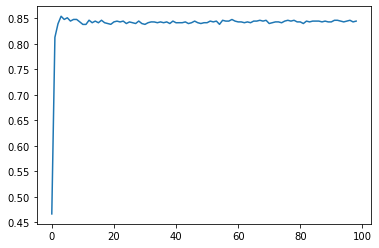

In [15]:
### explore number of quantiles on classification accuracy
def get_dataset():
    dataset = pd.read_csv('../dataset/sonar.csv',header=None)

    data = dataset.values

    X = data[:,:-1]
    y = data [:,-1]

    le = LabelEncoder()
    y = le.fit_transform(y.astype('str'))
    
    return X,y

#get list of models to evaluate
def get_models():
    models = {}
    
    for i in range(1,100):
        trans = QuantileTransformer(n_quantiles=i,output_distribution="uniform")
        model = KNeighborsClassifier()
        models[str(i)] = Pipeline([('tr',trans),('md',model)])
    return models

#evaluate given model using cross vall
def eval_model(model,X,y):
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
    n_scores = cross_val_score(model,X,y,cv=cv,scoring="accuracy",n_jobs=-1)
    
    return n_scores

X,y = get_dataset()

models = get_models()

results = []

for name,model in models.items():
    scores = eval_model(model,X,y)
    results.append(np.mean(scores))
    print('>%s %.3f (%.3f)'%(name,np.mean(scores),np.std(scores)))

plt.plot(results)
